#### Martyna Świercz, data t3

## Task 1 Analysis of the correlation between temperature and NDVI

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lst_files = ['C:/Users/Marynia/Desktop/AGH_2/Python_matlab/egzamin/task1/task1/t3_lst2023_Jul_Aug.tif', 'C:/Users/Marynia/Desktop/AGH_2/Python_matlab/egzamin/task1/task1/t3_lst2024May.tif']
ndvi_files = ['C:/Users/Marynia/Desktop/AGH_2/Python_matlab/egzamin/task1/task1/t3_ndvi2023_Jul_Aug.tif', 'C:/Users/Marynia/Desktop/AGH_2/Python_matlab/egzamin/task1/task1/t3_ndvi2024May.tif']

### Reads a GeoTIFF file and returns the raster data along with metadata

In [10]:
def read_geotiff(file_path):
    with rasterio.open(file_path) as dataset:
        return dataset.read(1), dataset.profile

### Displays temperature, NDVI, and their difference using different color maps

In [15]:
def plot_images(temp, ndvi, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].imshow(temp, cmap='plasma')
    axes[0].set_title(f'Temperature - {title}', fontsize=14, fontweight='bold', color='darkblue')
    axes[0].axis('off')
    
    axes[1].imshow(ndvi, cmap='cubehelix')
    axes[1].set_title(f'NDVI - {title}', fontsize=14, fontweight='bold', color='darkgreen')
    axes[1].axis('off')
    
    diff = temp - ndvi
    axes[2].imshow(diff, cmap='twilight')
    axes[2].set_title(f'Difference (Temp - NDVI) - {title}', fontsize=14, fontweight='bold', color='darkred')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

### Creates histograms for temperature and NDVI distributions

In [16]:
def plot_histograms(temp, ndvi, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(temp.ravel(), bins=50, color='#FF5733', alpha=0.8, edgecolor='black')
    axes[0].set_title(f'Temperature Histogram - {title}', fontsize=12, fontweight='bold', color='darkblue')
    
    axes[1].hist(ndvi.ravel(), bins=50, color='#33FF57', alpha=0.8, edgecolor='black')
    axes[1].set_title(f'NDVI Histogram - {title}', fontsize=12, fontweight='bold', color='darkgreen')
    
    plt.tight_layout()
    plt.show()

### Generates a scatter plot to visualize the correlation between NDVI and temperature

In [13]:
def scatter_plot(temp, ndvi, title):
    temp_flat = temp.ravel()
    ndvi_flat = ndvi.ravel()
    mask = ~np.isnan(temp_flat) & ~np.isnan(ndvi_flat)
    
    plt.figure(figsize=(7, 7))
    sns.scatterplot(x=ndvi_flat[mask], y=temp_flat[mask], alpha=0.5, edgecolor=None, color='#8A2BE2')
    plt.xlabel('NDVI', fontsize=12, fontweight='bold', color='darkgreen')
    plt.ylabel('Temperature', fontsize=12, fontweight='bold', color='darkblue')
    plt.title(f'Scatter Plot - {title}', fontsize=14, fontweight='bold', color='darkred')
    
    plt.show()

### Visualisation

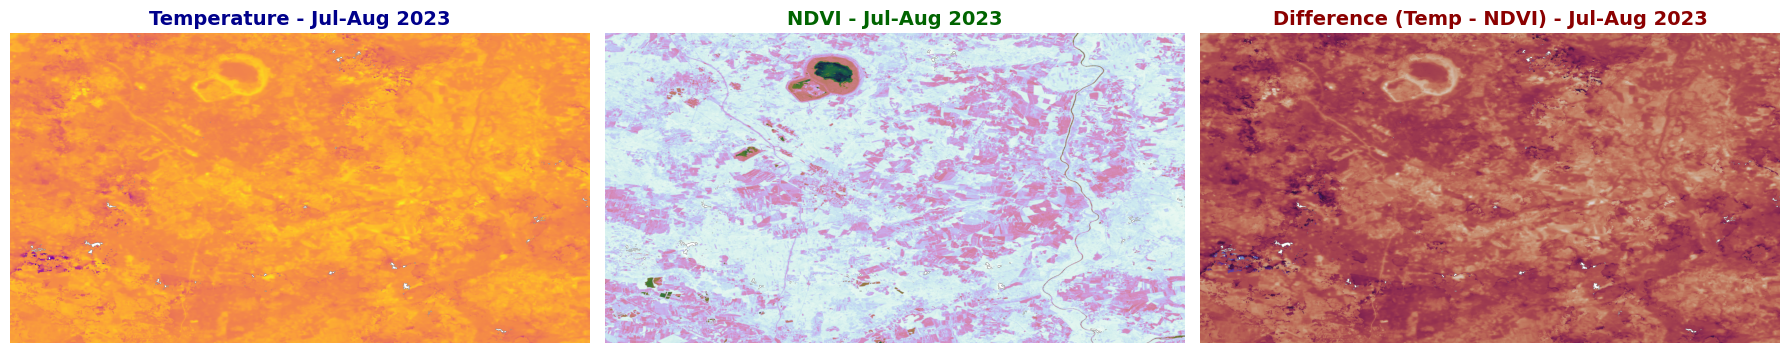

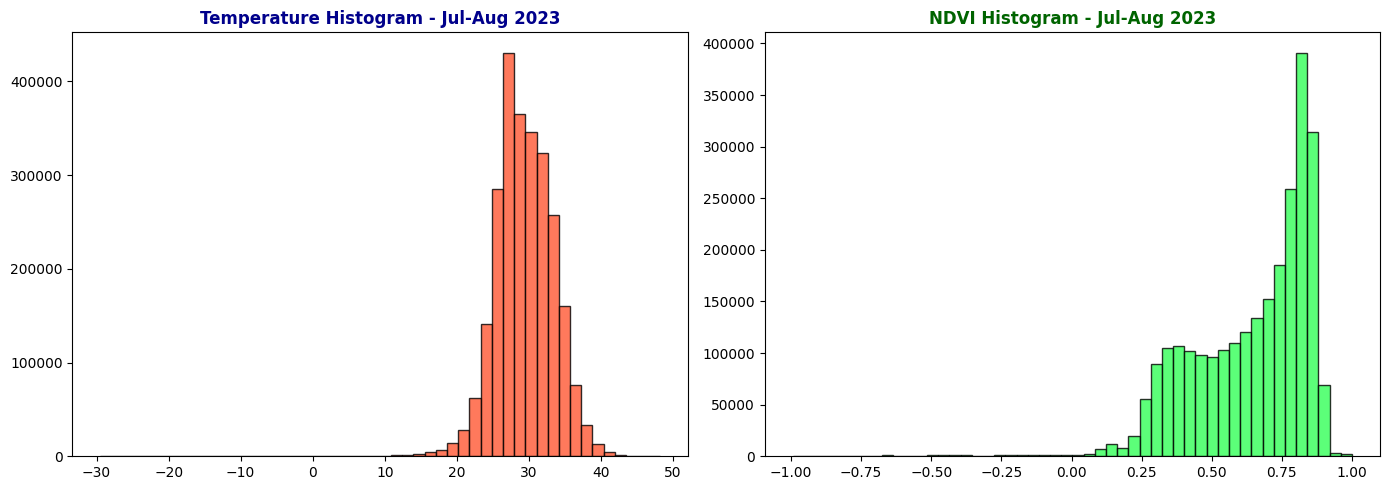

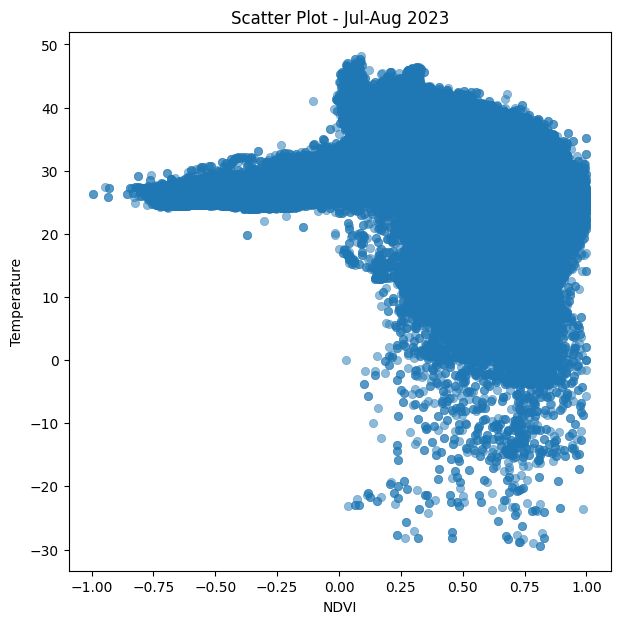

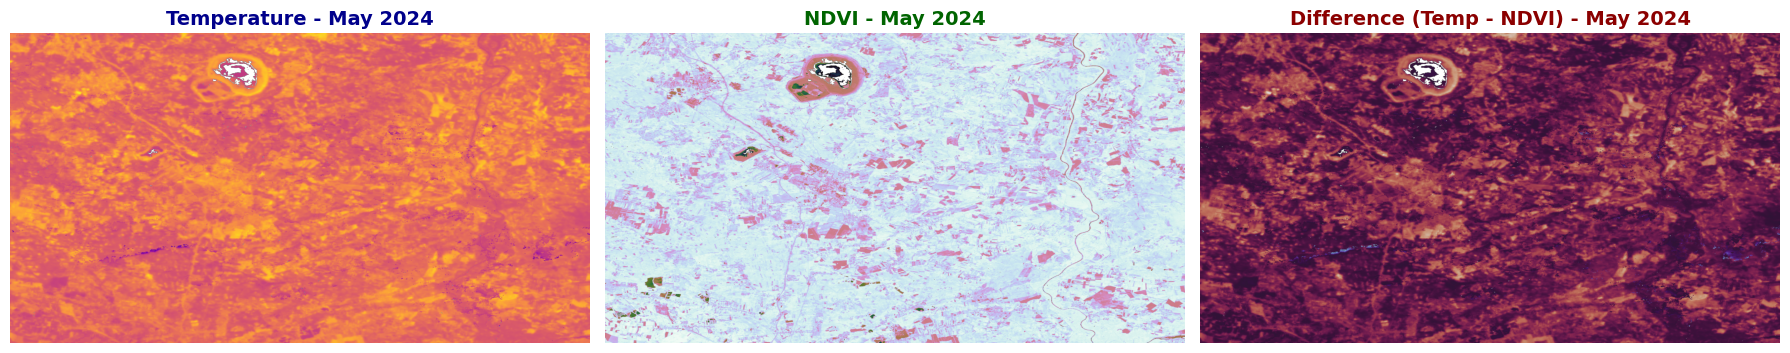

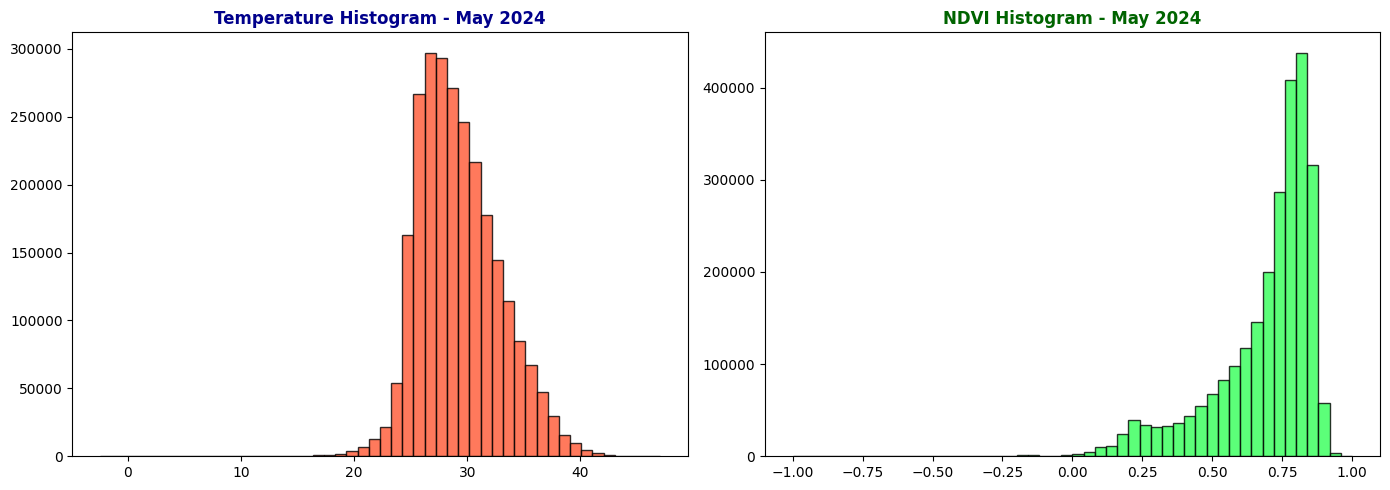

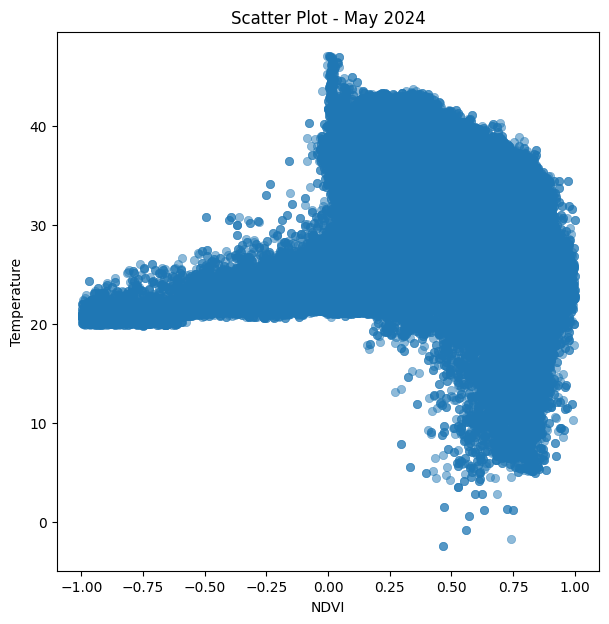

In [17]:
for i, (lst_file, ndvi_file) in enumerate(zip(lst_files, ndvi_files)):
    temp_data, _ = read_geotiff(lst_file)
    ndvi_data, _ = read_geotiff(ndvi_file)
    title = 'Jul-Aug 2023' if i == 0 else 'May 2024'
    
    plot_images(temp_data, ndvi_data, title)
    plot_histograms(temp_data, ndvi_data, title)
    scatter_plot(temp_data, ndvi_data, title)